In [1]:
import xarray as xr
import numpy as np
import pandas as pd

import os.path
from datetime import datetime, timedelta, date
import time

import matplotlib.pyplot as plt
import proplot as pplt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature

from nmme_utils import *

In [2]:
levs=np.arange(-35,36,5)
difflevs=np.arange(-4,5,1)
cmap='ColdHot'

### Read in CFSv2 Forecast

In [3]:
baseurl='http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.NCEP-CFSv2/.FORECAST/.EARLY_MONTH_SAMPLES/.MONTHLY/'
url=baseurl+'.sst/S/%28%200000%2001%20Jun%202023%29VALUES/dods/'
ds_cfsv2=xr.open_dataset(url,decode_times=False,chunks={'S':'500MB'}).sel(L=0.5,M=1.0).squeeze(drop=True)

In [4]:
#cfs_climo_file='/mcs/scratch/kpegion/nmme/climatology/monthly/1991-2020/NCEP-CFSv2.sst_sfc.clim.1991-2020.nc'
cfs_climo_file='testsstclim.nc'

ds_cfsv2_climo=xr.open_dataset(cfs_climo_file).sel(lead=0,month=6).squeeze(drop=True)
ds_cfsv2_climo

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    lead     int64 0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    month    int64 6
Data variables:
    sst      (lat, lon) float64 ...
Attributes:
    Conventions:  IRIDL

### Read in CCSM4

In [5]:
baseurl='http://iridl.ldeo.columbia.edu/SOURCES/.Models/.NMME/.COLA-RSMAS-CCSM4/.MONTHLY/'
url=baseurl+'.sst/S/%28%200000%2001%20Jun%202023%29VALUES/dods/'
ds_ccsm=xr.open_dataset(url,decode_times=False,chunks={'S':'500MB'}).sel(L=0.5,M=1.0).squeeze(drop=True)

In [6]:
ds_ccsm

<xarray.Dataset>
Dimensions:  (X: 360, Y: 181)
Coordinates:
    L        float32 0.5
    M        float32 1.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    sst      (Y, X) float32 dask.array<chunksize=(181, 360), meta=np.ndarray>
Attributes:
    Conventions:  IRIDL

In [7]:
ccsm_climo_file='/mcs/scratch/kpegion/nmme/climatology/monthly/1991-2020/COLA-RSMAS-CCSM4.sst_sfc.clim.1991-2020.nc'
ds_ccsm_climo=xr.open_dataset(ccsm_climo_file).sel(lead=0,month=6).squeeze(drop=True)
ds_ccsm_climo

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
    lead     int64 0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
    month    int64 6
Data variables:
    sst      (lat, lon) float64 ...
Attributes:
    Conventions:  IRIDL

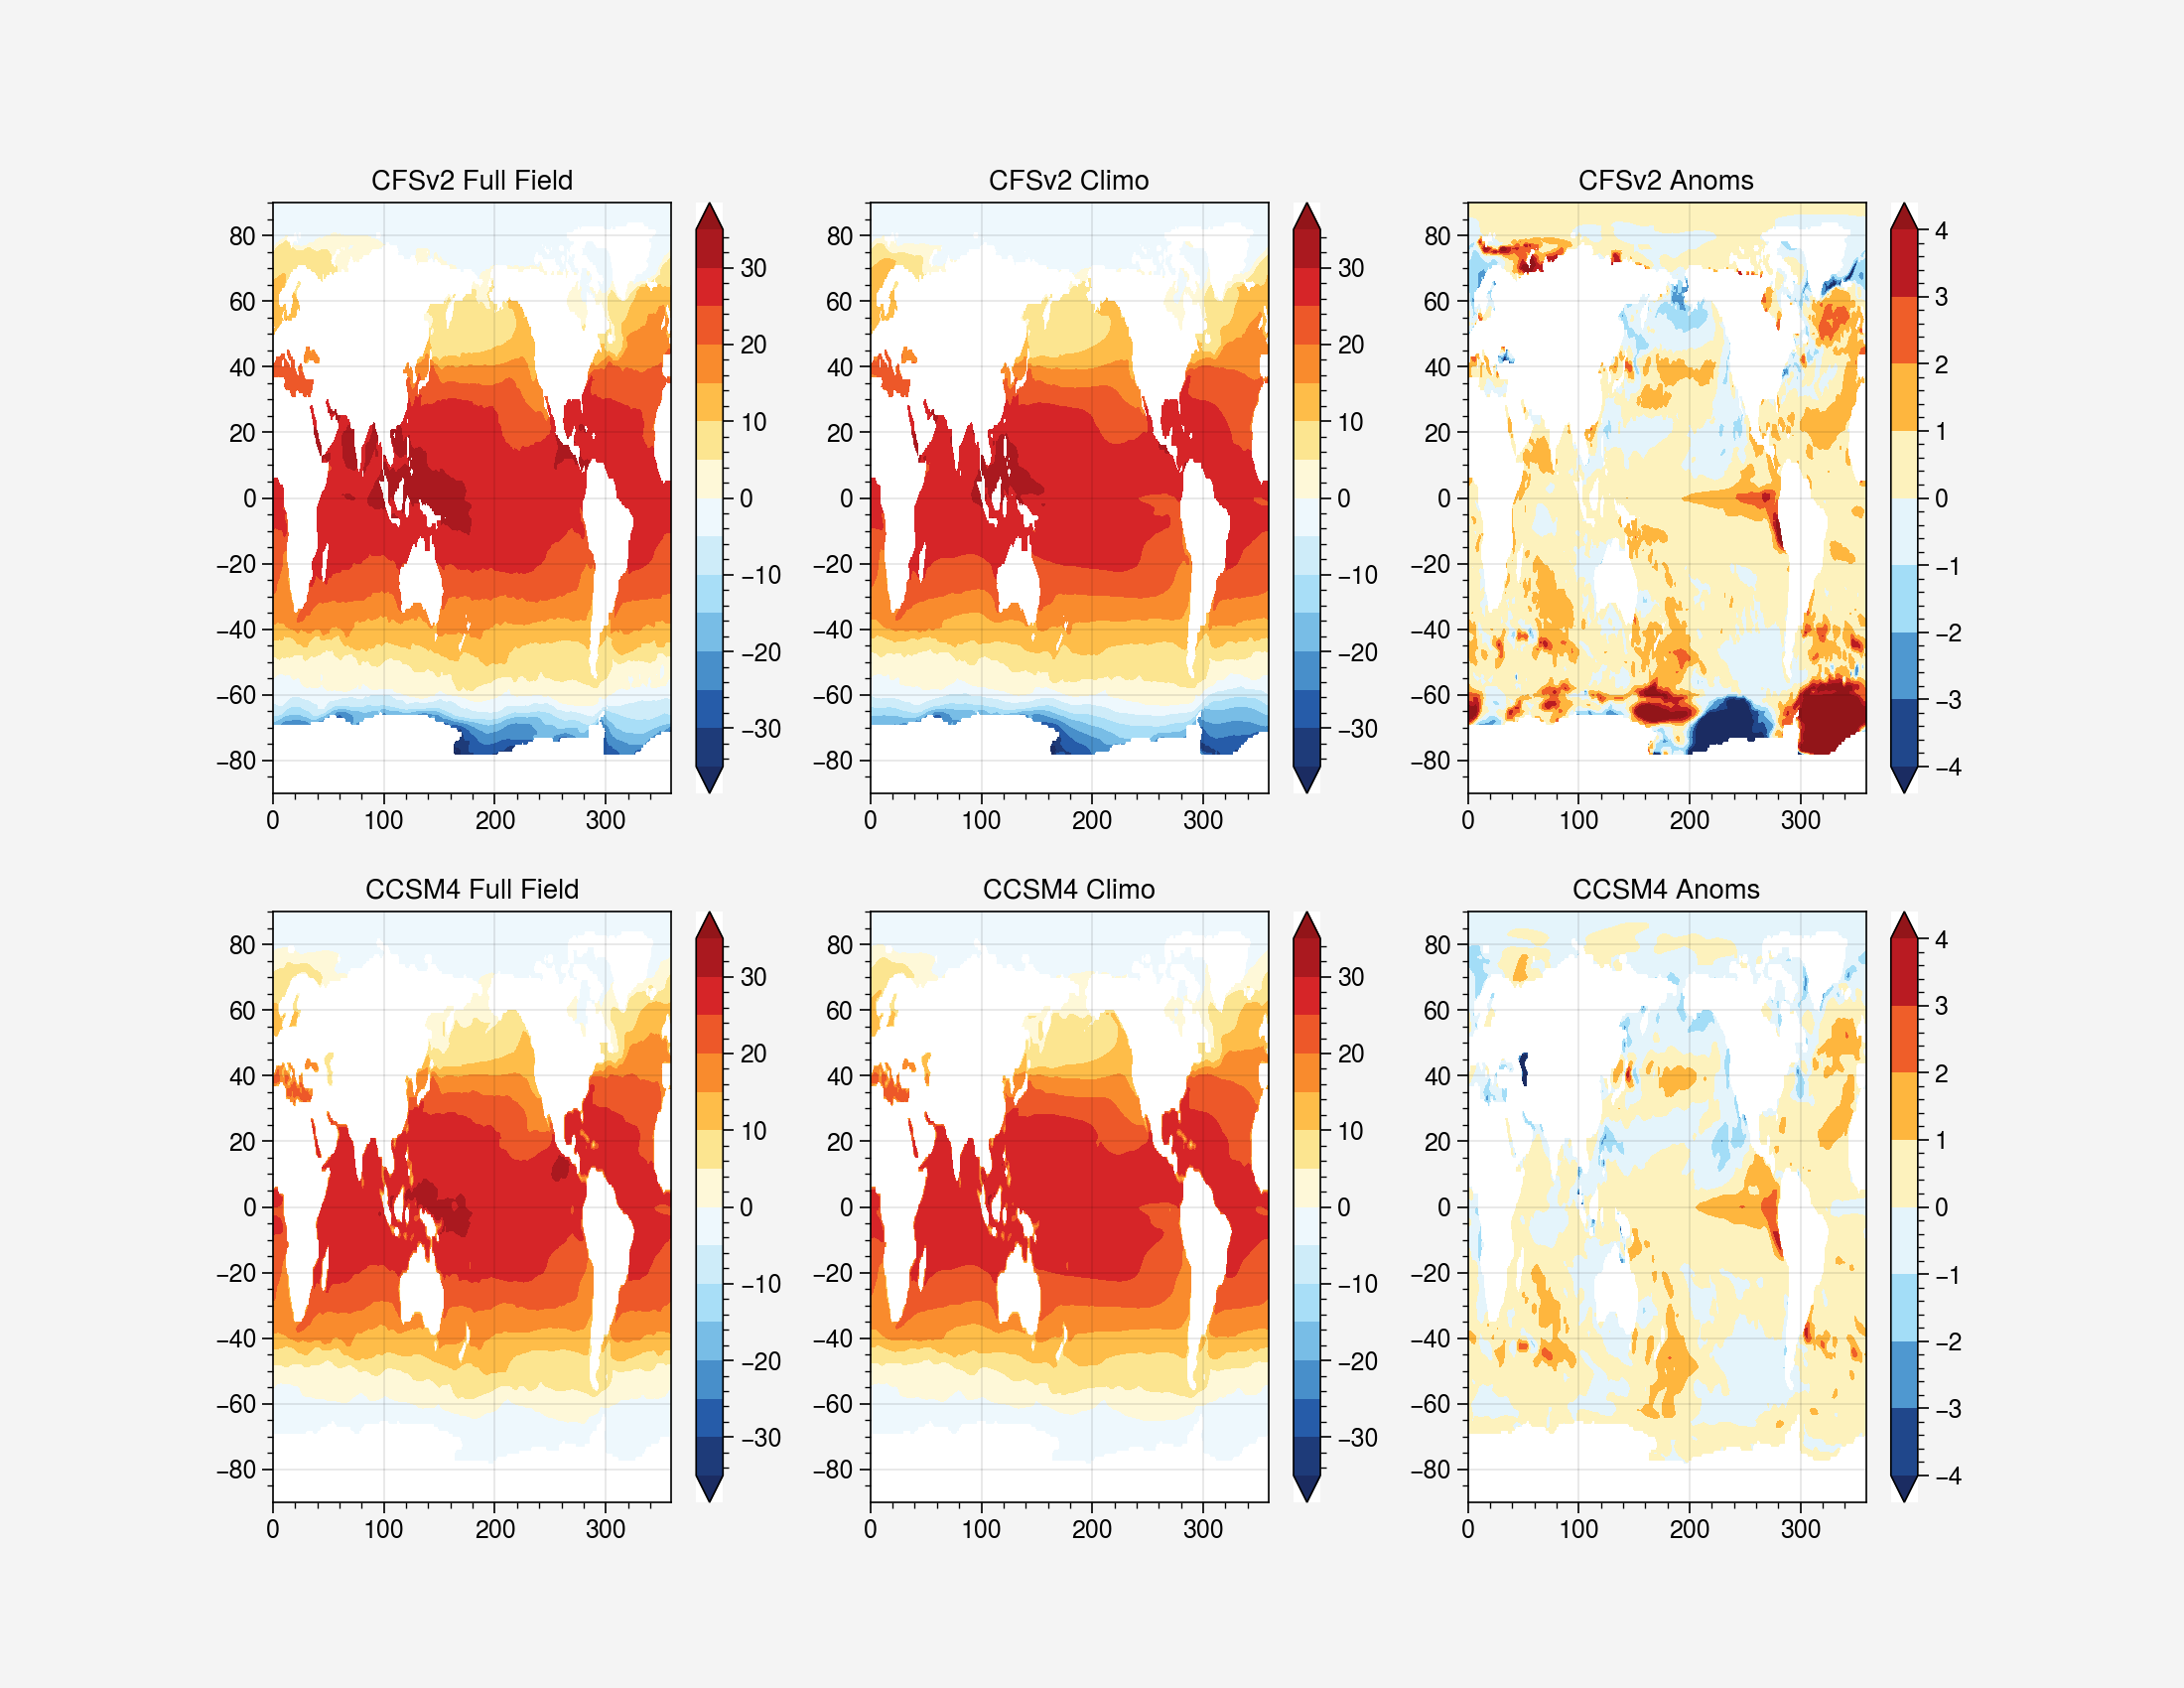

In [8]:
fig = plt.figure(figsize=(11,8.5))

# CFSv2 Full Field
plt.subplot(2,3,1)
plt.contourf(ds_cfsv2['X'],ds_cfsv2['Y'],ds_cfsv2['sst'],levs,cmap=cmap,extend='both')
plt.title('CFSv2 Full Field')
plt.colorbar()

# CFSv2 Climo
plt.subplot(2,3,2)
plt.contourf(ds_cfsv2_climo['lon'],ds_cfsv2_climo['lat'],ds_cfsv2_climo['sst'],levs,cmap=cmap,extend='both')
plt.title('CFSv2 Climo')
plt.colorbar()

# CFSv2 Anoms
plt.subplot(2,3,3)
diff=ds_cfsv2['sst'].values-ds_cfsv2_climo['sst'].values
plt.contourf(ds_cfsv2_climo['lon'],ds_cfsv2_climo['lat'],diff,difflevs,cmap=cmap,extend='both')
plt.title('CFSv2 Anoms')
plt.colorbar()

# CCSM Full Field
plt.subplot(2,3,4)
plt.contourf(ds_ccsm['X'],ds_ccsm['Y'],ds_ccsm['sst'],levs,cmap=cmap,extend='both')
plt.title('CCSM4 Full Field')
plt.colorbar()

# CCSM Climo
plt.subplot(2,3,5)
plt.contourf(ds_ccsm_climo['lon'],ds_ccsm_climo['lat'],ds_ccsm_climo['sst'],levs,cmap=cmap,extend='both')
plt.title('CCSM4 Climo')
plt.colorbar()

# CCSM Anoms
plt.subplot(2,3,6)
diff=ds_ccsm['sst'].values-ds_ccsm_climo['sst'].values
plt.contourf(ds_ccsm['X'],ds_ccsm['Y'],diff,difflevs,cmap=cmap,extend='both')
plt.title('CCSM4 Anoms')
plt.colorbar()

### Plot all the CFSv2 Climos

In [9]:
cfs_climo_file='/mcs/scratch/kpegion/nmme/climatology/monthly/1991-2020/NCEP-CFSv2.sst_sfc.clim.1991-2020.nc'
#cfs_climo_file='testsstclim.nc'

ds_cfsv2_climo=xr.open_dataset(cfs_climo_file) 
ds_cfsv2_climo

<xarray.Dataset>
Dimensions:  (lat: 181, lead: 10, lon: 360, month: 12)
Coordinates:
  * lat      (lat) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lead     (lead) int64 0 1 2 3 4 5 6 7 8 9
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, lead, lat, lon) float64 ...
Attributes:
    Conventions:  IRIDL

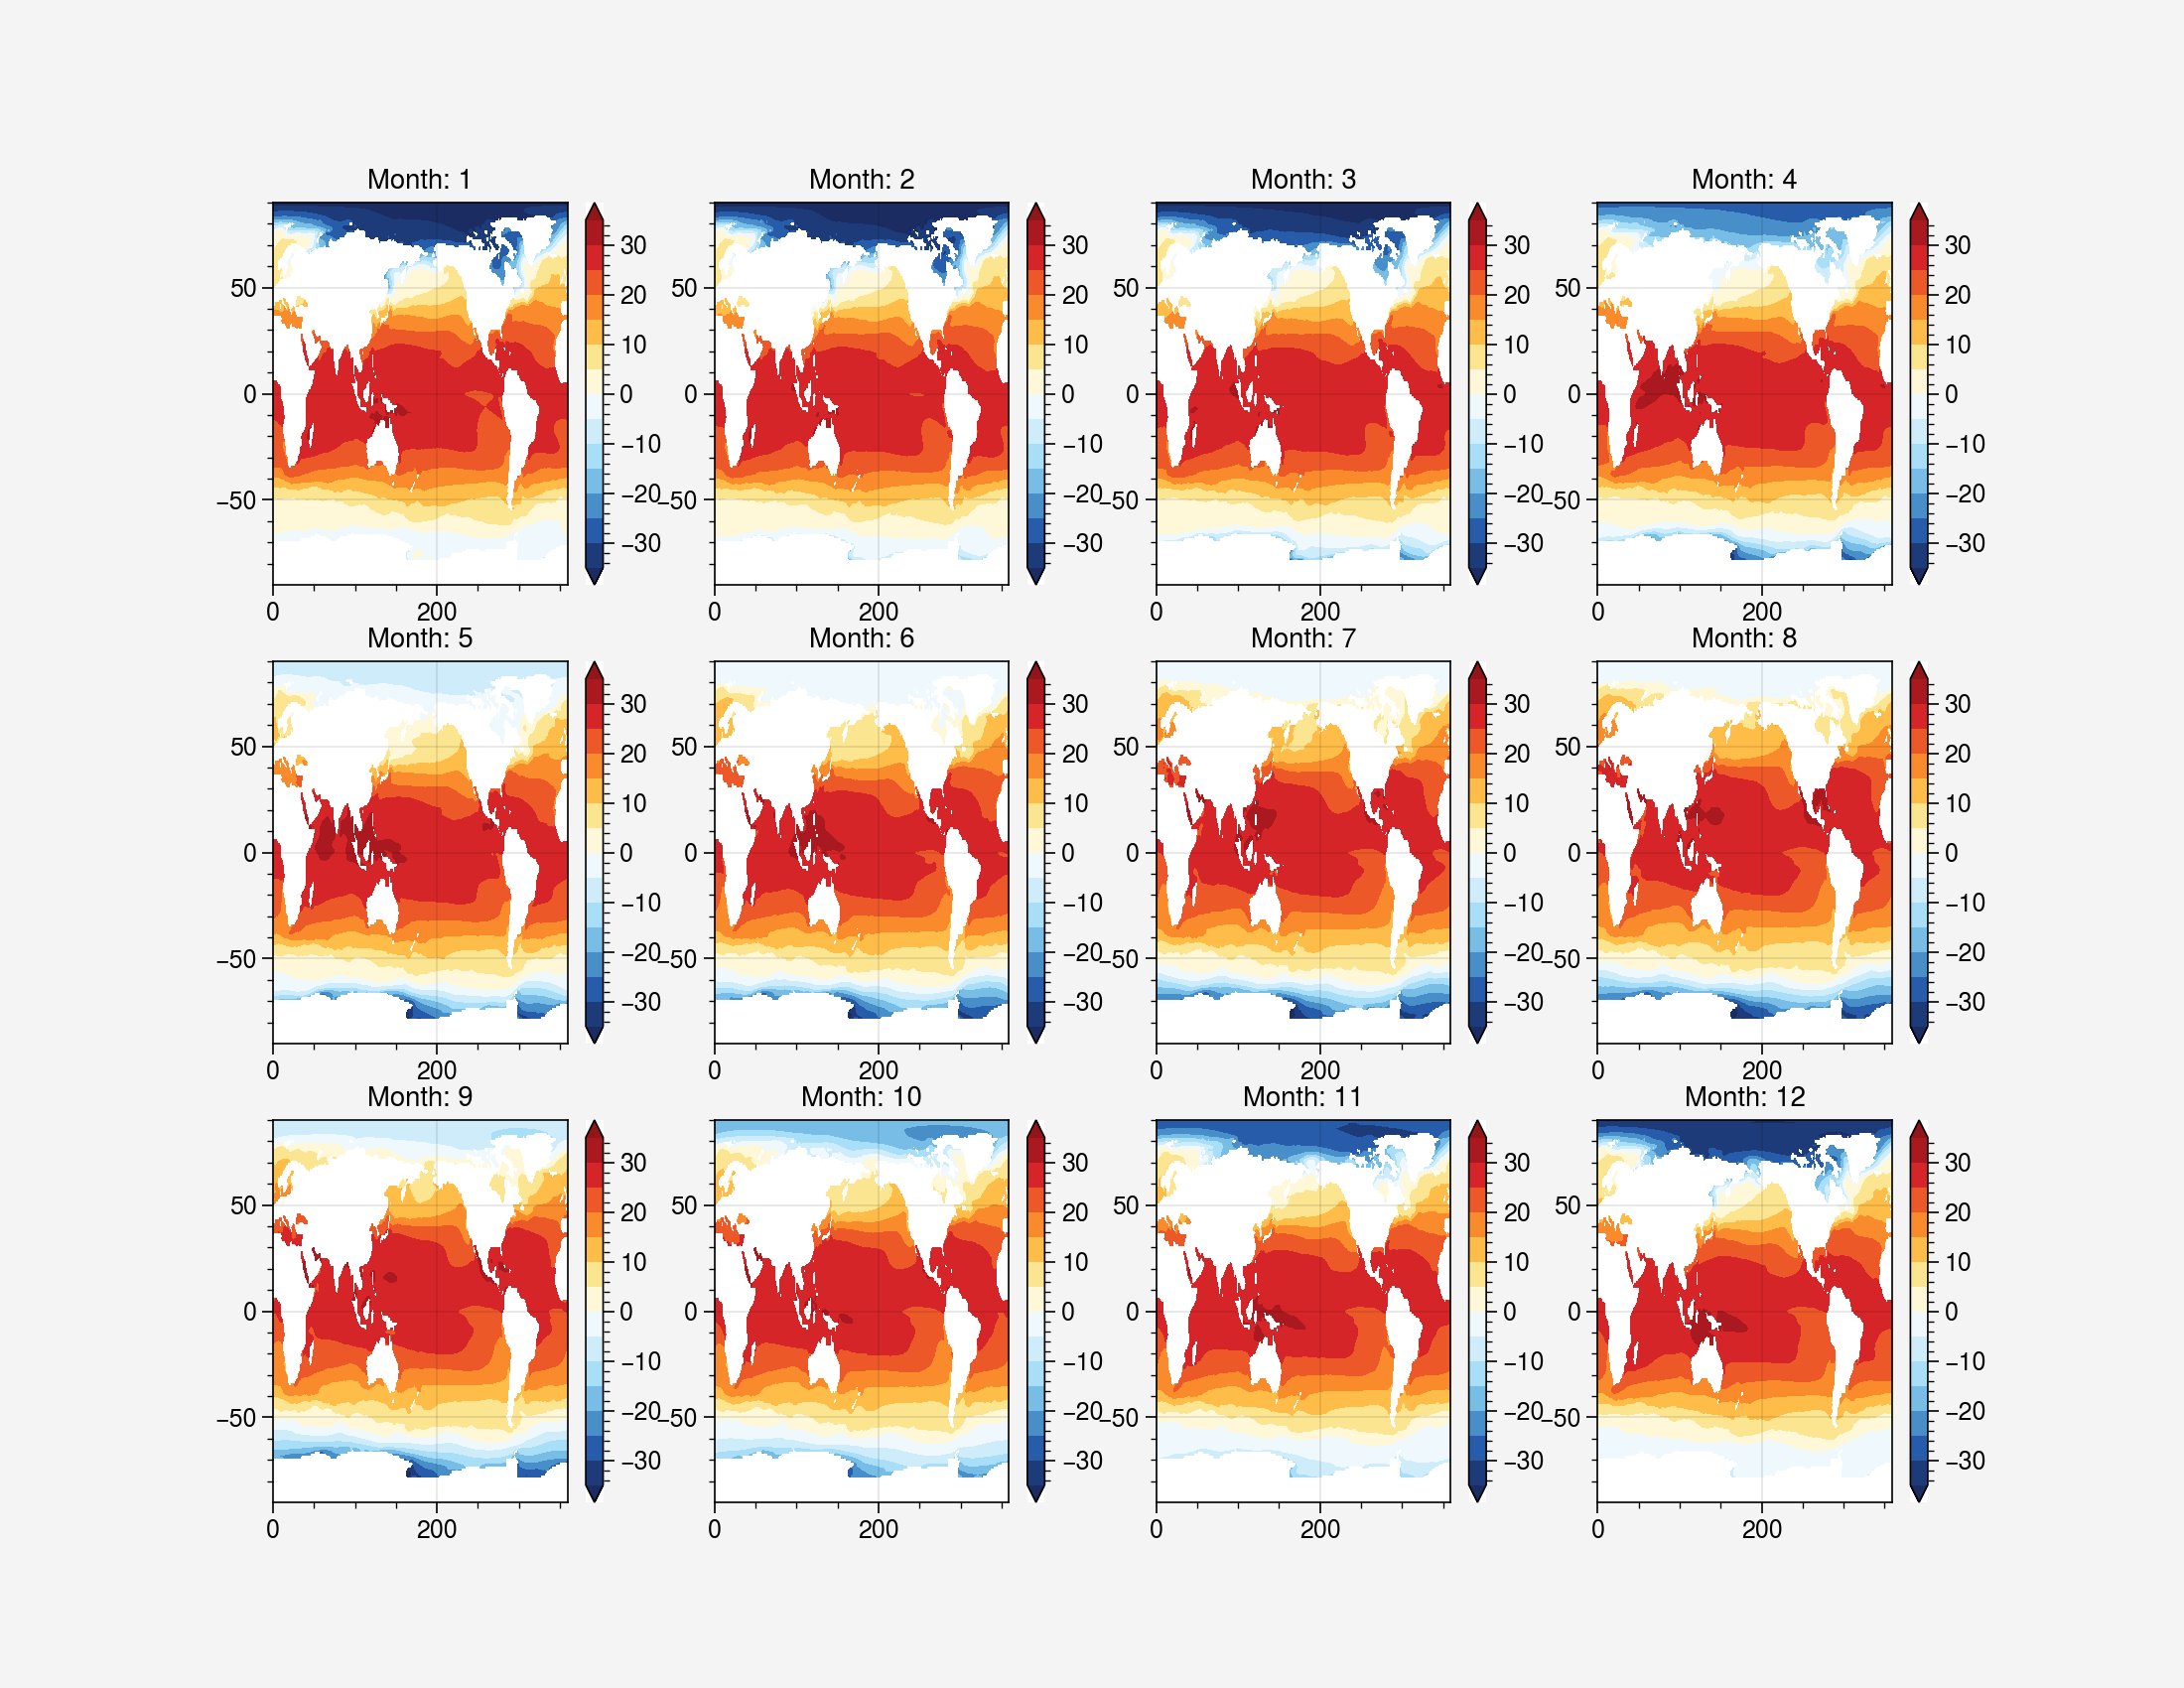

In [10]:
fig = plt.figure(figsize=(11,8.5))

for i in np.arange(1,13):
    
    ds_climo=ds_cfsv2_climo.sel(lead=0,month=i).squeeze(drop=True)
    
    # CFSv2 Climo
    plt.subplot(3,4,i)
    plt.contourf(ds_climo['lon'],ds_climo['lat'],ds_climo['sst'],levs,cmap=cmap,extend='both')
    plt.title('Month: '+str(i))
    plt.colorbar()
    